In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_lines(file_handle):
    for line in file_handle:
        line = line.split('#!')[0].strip()
        if not line:
            continue
        yield line

The following two plots use the output of
```bash
plumed sum_hills --bin 360,15 --min -pi,0 --max pi,15 --hills HILLS_2D
```

Note that using 15 bins from 0 to 15 puts lambda values exactly on the integer values (15 bins, 16 boundaries from 0 to 15). The width of the Gaussian in lambda dimension is very narrow, so "closer to integers" is likely not good enough.

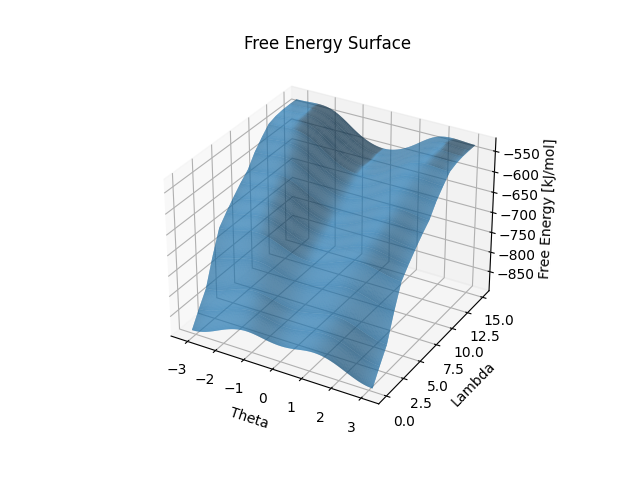

In [3]:
# Plot FE surface
theta_ = []
lambda_ = []
fes_ = []
with open('fes.dat') as fes_file:
    for line in get_lines(fes_file):
        fields = [float(n) for n in line.split()]
        theta_.append(fields[0])
        lambda_.append(fields[1])
        fes_.append(fields[2])

theta_ = np.array(theta_)
lambda_ = np.array(lambda_)
fes_ = np.array(fes_)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(theta_, lambda_, fes_)
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_zlabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface')
plt.show()

* Very large difference between lower states and upper states
* Poorly visited upper λ states?

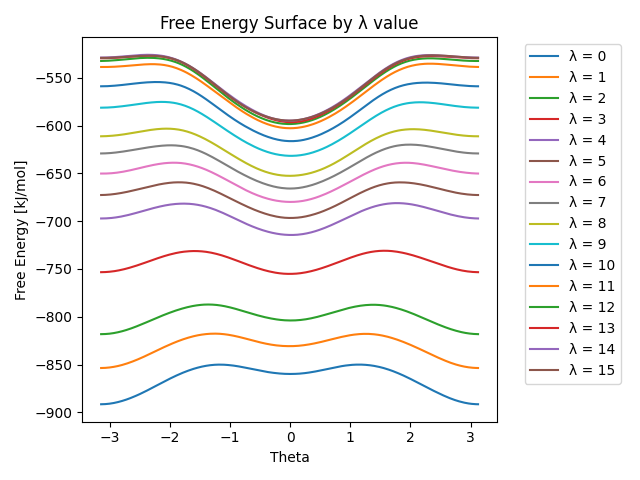

In [4]:
fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.plot(theta_[lambda_ == lam], fes_[lambda_ == lam], label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Theta')
ax.set_ylabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface by λ value')
plt.tight_layout()
plt.show()

The next two plots use the unedited `HILLS_2D` file as an input

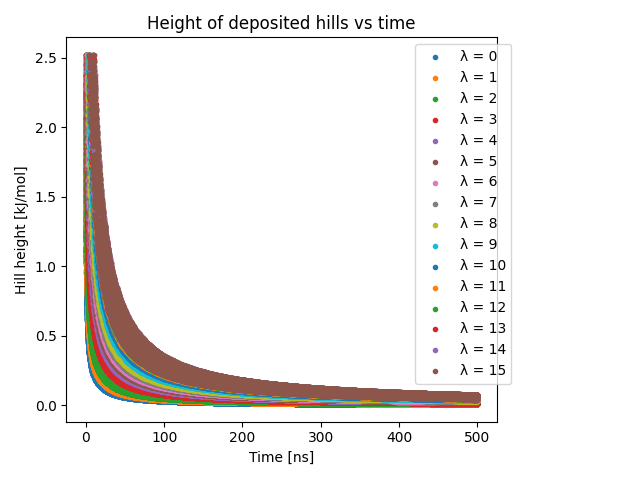

In [5]:
# Plot deposited hills
time_ = []
height_ = []
theta_ = []
lambda_ = []
with open('HILLS_2D') as hills_file:
    for line in get_lines(hills_file):
        fields = [float(n) for n in line.split()]
        time_.append(fields[0])
        height_.append(fields[-2])
        theta_.append(fields[1])
        lambda_.append(fields[2])

time_ = np.array(time_) * 1e-3
height_ = np.array(height_)
theta_ = np.array(theta_)
lambda_ = np.array(lambda_)

fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.scatter(time_[lambda_ == lam], height_[lambda_ == lam], marker='.', label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Time [ns]')
ax.set_ylabel('Hill height [kJ/mol]')
ax.set_title('Height of deposited hills vs time')
plt.tight_layout()
plt.show()

<ipython-input-6-59b79d9cce87>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under('white')


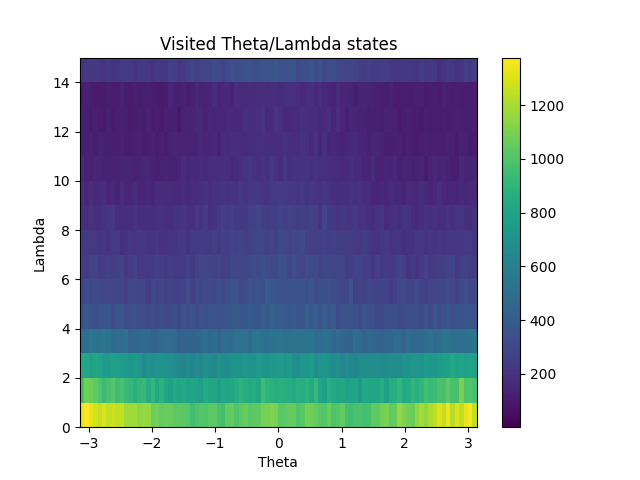

In [6]:
fig, ax = plt.subplots()
cmap = plt.cm.viridis
cmap.set_under('white')
plt.hist2d(theta_, lambda_, bins=(90, 15), cmap=cmap, vmin=1)
plt.colorbar()
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_title('Visited Theta/Lambda states')
plt.show()

<ipython-input-19-18b2fdef5c75>:7: RuntimeWarning: invalid value encountered in long_scalars
  lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
<ipython-input-19-18b2fdef5c75>:8: RuntimeWarning: invalid value encountered in long_scalars
  theta_flatness.append(min(theta_hist) / max(theta_hist))


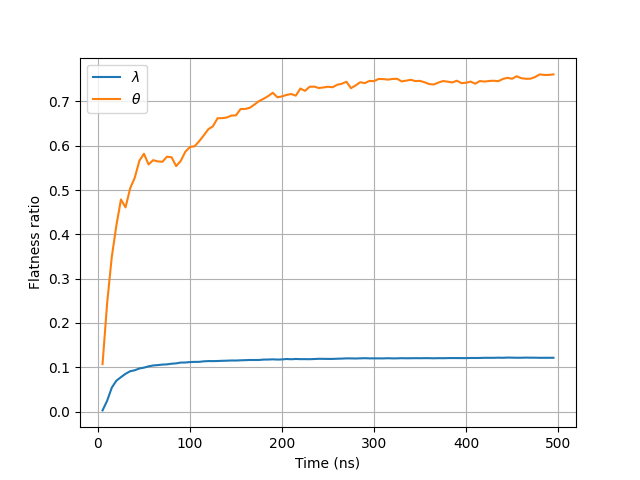

In [19]:
# Here we analyze the flatness of the lambda distribution as a function of time (this takes long)
lambda_flatness, theta_flatness = [], []
for i in range(len(lambda_)):
    if i % 5000 == 0:
        lambda_hist = np.histogram(lambda_[:i], bins=15)[0]
        theta_hist = np.histogram(theta_[:i], bins=360)[0]
        lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
        theta_flatness.append(min(theta_hist) / max(theta_hist))

plt.figure()
plt.plot(time_[::5000], lambda_flatness, label='$\lambda$')
plt.plot(time_[::5000], theta_flatness, label=r'$\theta$')
plt.xlabel('Time (ns)')
plt.ylabel('Flatness ratio')
plt.legend()
plt.grid()